In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cd Downloads

C:\Users\shashank s\Downloads


In [3]:
data=pd.read_csv(r'train.csv')
test=pd.read_csv(r'test_crime.csv')
test_ids=test['Id']

In [39]:
columns_to_drop = ['Id', 'Descript', 'Resolution']
columns_to_drop = [col for col in columns_to_drop if col in test.columns]
test_data = test.drop(columns=columns_to_drop, errors='ignore')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Dates       878049 non-null  object 
 1   Category    878049 non-null  object 
 2   Descript    878049 non-null  object 
 3   DayOfWeek   878049 non-null  object 
 4   PdDistrict  878049 non-null  object 
 5   Resolution  878049 non-null  object 
 6   Address     878049 non-null  object 
 7   X           878049 non-null  float64
 8   Y           878049 non-null  float64
dtypes: float64(2), object(7)
memory usage: 60.3+ MB


In [10]:
columns_to_drop=['Dates','Address']

data=data.drop(columns_to_drop, axis=True)
test=test.drop(columns_to_drop, axis=True)

In [11]:
data.head()

,Category,Descript,DayOfWeek,PdDistrict,Resolution,X,Y
0,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",-122.425892,37.774599
1,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",-122.425892,37.774599
2,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",-122.424363,37.800414
3,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,-122.426995,37.800873
4,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,-122.438738,37.771541


In [40]:
test_data.head()

,DayOfWeek,PdDistrict,X,Y
0,3,0,-122.399588,37.735051
1,3,0,-122.391523,37.732432
2,3,4,-122.426002,37.792212
3,3,2,-122.437394,37.721412
4,3,2,-122.437394,37.721412


In [12]:
test.head()

,Id,DayOfWeek,PdDistrict,X,Y
0,0,Sunday,BAYVIEW,-122.399588,37.735051
1,1,Sunday,BAYVIEW,-122.391523,37.732432
2,2,Sunday,NORTHERN,-122.426002,37.792212
3,3,Sunday,INGLESIDE,-122.437394,37.721412
4,4,Sunday,INGLESIDE,-122.437394,37.721412


In [13]:
from sklearn.preprocessing import LabelEncoder

lb=LabelEncoder()

In [14]:
columns_to_encode= ['Category', 'Descript', 'DayOfWeek', 'PdDistrict', 'Resolution']

for col in columns_to_encode:
    data[col]= lb.fit_transform(data[col])


In [15]:
columns_to_encode=['Id', 'DayOfWeek','PdDistrict']

for col in columns_to_encode:
    test[col]=lb.fit_transform(test[col])

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Category    878049 non-null  int32  
 1   Descript    878049 non-null  int32  
 2   DayOfWeek   878049 non-null  int32  
 3   PdDistrict  878049 non-null  int32  
 4   Resolution  878049 non-null  int32  
 5   X           878049 non-null  float64
 6   Y           878049 non-null  float64
dtypes: float64(2), int32(5)
memory usage: 30.1 MB


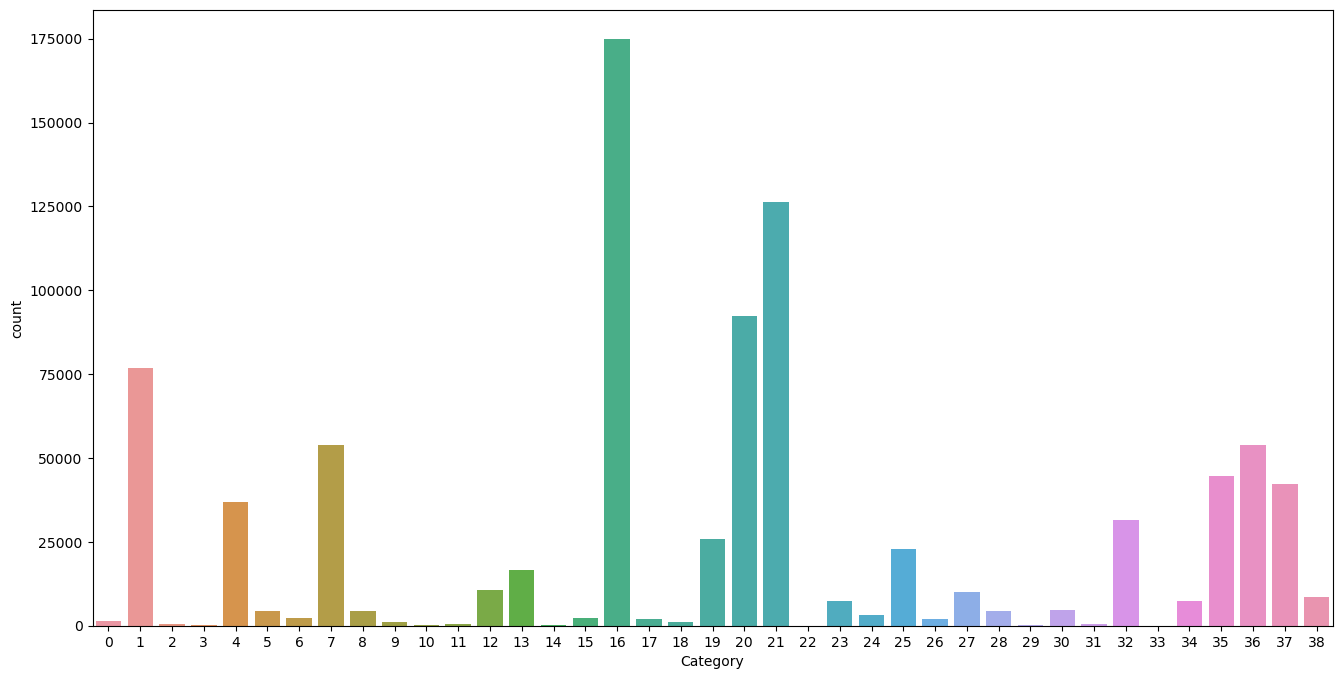

In [17]:
plt.figure(figsize=(16, 8))
sns.countplot(x='Category', data=data)

plt.show()

In [18]:
data['Category'].value_counts()

16    174900
21    126182
20     92304
1      76876
7      53971
36     53781
35     44725
37     42214
4      36755
32     31414
19     25989
25     23000
13     16679
12     10609
27      9985
38      8555
23      7484
34      7326
30      4540
28      4388
5       4320
8       4280
24      3138
15      2341
6       2268
26      1946
17      1903
0       1513
18      1225
9       1166
31       508
11       491
2        406
3        289
10       256
29       148
14       146
22        22
33         6
Name: Category, dtype: int64

In [19]:
x=data.drop('Category', axis=True)

In [20]:
x.head()

,Descript,DayOfWeek,PdDistrict,Resolution,X,Y
0,866,6,4,0,-122.425892,37.774599
1,810,6,4,0,-122.425892,37.774599
2,810,6,4,0,-122.424363,37.800414
3,404,6,4,11,-122.426995,37.800873
4,404,6,5,11,-122.438738,37.771541


In [21]:
y=data['Category']
y.head()

0    37
1    21
2    21
3    16
4    16
Name: Category, dtype: int32

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)

In [24]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(702439, 6)
(175610, 6)
(702439,)
(175610,)


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [26]:
model=RandomForestClassifier(n_estimators= 100, random_state=42)
#model=LogisticRegression()

In [27]:
model

RandomForestClassifier(random_state=42)

In [28]:
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [29]:
y_pred=model.predict(x_test)

In [30]:
y_pred

array([16,  1, 21, ..., 35, 35, 38])

In [31]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [32]:
accuracy_score(y_test, y_pred)

0.9630544957576448

In [33]:
print(confusion_matrix(y_test,y_pred))

[[  267    31     0 ...     0     0     0]
 [    8 14924     0 ...     7     9    15]
 [    0     1    18 ...     0     0     0]
 ...
 [    0    19     0 ... 10218     0     0]
 [    0     4     0 ...     0  8385     9]
 [    1    24     0 ...     1    11  1333]]


In [34]:
print(classification_report(y_test, y_pred))

C:\Users\shashank s\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.92      0.83      0.87       321
           1       0.95      0.97      0.96     15364
           2       0.90      0.25      0.39        72
           3       0.85      0.38      0.52        58
           4       1.00      1.00      1.00      7389
           5       0.88      0.82      0.85       828
           6       0.96      0.89      0.92       459
           7       0.98      0.98      0.98     10723
           8       0.84      0.93      0.89       857
           9       0.75      0.59      0.66       222
          10       0.30      0.06      0.10        51
          11       0.85      0.25      0.39        92
          12       0.85      0.89      0.87      2092
          13       0.91      0.88      0.89      3277
          14       0.53      0.24      0.33        33
          15       0.63      0.45      0.52       435
          16       1.00      0.99      0.99     35099
          17       0.81    

C:\Users\shashank s\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shashank s\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
